# Load The Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as  sns
from collections import Counter 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
%run mirazul_ploting_utils.ipynb

In [3]:
#import optuna

In [4]:
# import os
# print(os.getcwd())

In [6]:
df = pd.read_csv('/home/masharifin/Documents/ComprehensiveExam/Datasets/ObfuscatedMalMem2022.csv')
df

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,Benign
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,Benign
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,Benign
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,Benign
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,221,26,24,116,0,120,86,0,8,Malware
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,221,26,24,116,0,116,88,0,8,Malware
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,221,26,24,116,0,120,88,0,8,Malware
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,221,26,24,116,0,120,87,0,8,Malware


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   pslist.nproc                            58596 non-null  int64  
 1   pslist.nppid                            58596 non-null  int64  
 2   pslist.avg_threads                      58596 non-null  float64
 3   pslist.nprocs64bit                      58596 non-null  int64  
 4   pslist.avg_handlers                     58596 non-null  float64
 5   dlllist.ndlls                           58596 non-null  int64  
 6   dlllist.avg_dlls_per_proc               58596 non-null  float64
 7   handles.nhandles                        58596 non-null  int64  
 8   handles.avg_handles_per_proc            58596 non-null  float64
 9   handles.nport                           58596 non-null  int64  
 10  handles.nfile                           58596 non-null  in

In [6]:
df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [7]:
# memory = df.memory_usage()
# print(memory)
# print("Total Memory Usage = ",sum(memory))

In [8]:
df.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,Benign
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,Benign
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,Benign
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,Benign
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,Benign


# Plot the Data

In [9]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Load your dataset
# df = pd.read_csv('/home/masharifin/Documents/ComprehensiveExam/Datasets/ObfuscatedMalMem2022.csv')

# # Example visualization: Histogram
# plt.hist(df['pslist.avg_handlers'], bins=20)
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Histogram of column_name')
# plt.show()

In [10]:
# # Example visualization: Box plot
# plt.boxplot(df['column_name'])
# plt.xlabel('column_name')
# plt.title('Box plot of column_name')
# plt.show()

# # Example visualization: Scatter plot
# plt.scatter(df['column_name1'], df['column_name2'])
# plt.xlabel('column_name1')
# plt.ylabel('column_name2')
# plt.title('Scatter plot')
# plt.show()

# # Example visualization: Violin plot
# plt.violinplot(df['column_name'])
# plt.xlabel('column_name')
# plt.ylabel('Values')
# plt.title('Violin plot of column_name')
# plt.show()

# Replace Benign and Malware with 0/1

In [11]:
# df.Class.value_counts()

In [7]:
df['Class'] = df['Class'].replace({'Benign': 0, 'Malware': 1})

# Drop the label Column

In [13]:
features = df.drop('Class', axis=1).values
Class = df['Class'].values

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


In [14]:
df1=df

In [15]:
x=df1.drop(columns='Class')

In [16]:
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#X_set, y_set = x, y

Heatmap

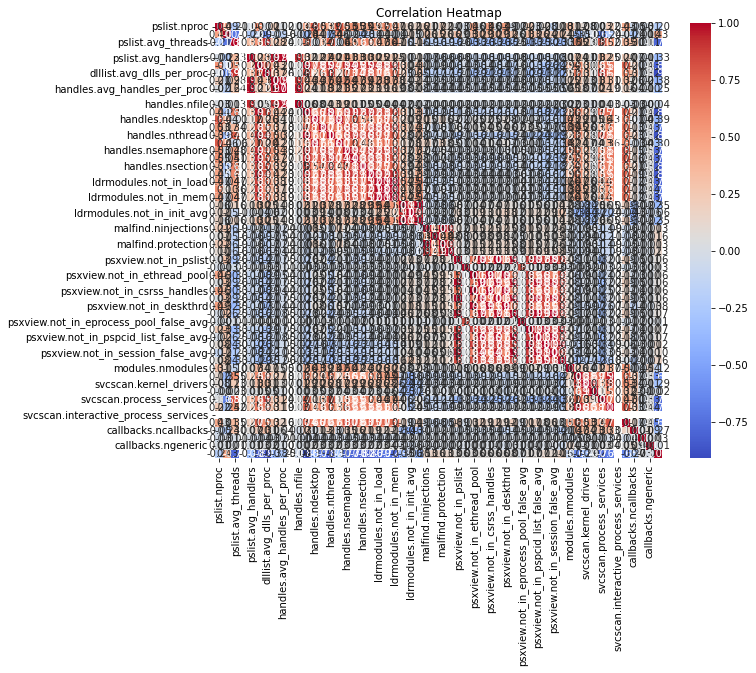

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
#df = pd.DataFrame(...)  # Replace '...' with your DataFrame initialization code

# Generate heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")  # Set the title of the heatmap
plt.show()


#  Drop the Null Value

In [18]:
print("Size before dropping NaN rows",df.shape,"\n")

nan_dropped = df1.dropna()

print(nan_dropped.isnull().sum())
print("\nSize after dropping NaN rows",nan_dropped.shape)

Size before dropping NaN rows (58596, 56) 

pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [19]:
y=df1['Class']
y

0        0
1        0
2        0
3        0
4        0
        ..
58591    1
58592    1
58593    1
58594    1
58595    1
Name: Class, Length: 58596, dtype: int64

In [20]:
Counter(y)

Counter({0: 29298, 1: 29298})

In [21]:
Counter(x)

Counter({'pslist.nproc': 1,
         'pslist.nppid': 1,
         'pslist.avg_threads': 1,
         'pslist.nprocs64bit': 1,
         'pslist.avg_handlers': 1,
         'dlllist.ndlls': 1,
         'dlllist.avg_dlls_per_proc': 1,
         'handles.nhandles': 1,
         'handles.avg_handles_per_proc': 1,
         'handles.nport': 1,
         'handles.nfile': 1,
         'handles.nevent': 1,
         'handles.ndesktop': 1,
         'handles.nkey': 1,
         'handles.nthread': 1,
         'handles.ndirectory': 1,
         'handles.nsemaphore': 1,
         'handles.ntimer': 1,
         'handles.nsection': 1,
         'handles.nmutant': 1,
         'ldrmodules.not_in_load': 1,
         'ldrmodules.not_in_init': 1,
         'ldrmodules.not_in_mem': 1,
         'ldrmodules.not_in_load_avg': 1,
         'ldrmodules.not_in_init_avg': 1,
         'ldrmodules.not_in_mem_avg': 1,
         'malfind.ninjections': 1,
         'malfind.commitCharge': 1,
         'malfind.protection': 1,
         'ma

# Train Test Split

In [22]:
#X_train_main,X_test_main,y_train_main,y_test_main= train_test_split(x,y,random_state=69)

In [23]:
#Counter(y_test_main) 

In [24]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [25]:
# Step 1: Shuffle the Dataset
# Assuming you have your dataset stored in X (features) and y (labels) arrays
# If your dataset is a single array, you can skip this step
x_shuffled, y_shuffled = shuffle(x, y, random_state=42)

In [26]:
# Step 2: Determine the Split Size
train_size = 0.6  # 70% for training, 30% for testing

In [27]:
# Step 3: Select Training and Test Samples
X_train, X_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, train_size=train_size, random_state=42)

In [28]:
# Step 4: Split the Features and Labels (if applicable)
# If your dataset already has separate arrays for features and labels, you can skip this step

# Step 5: Perform Data Preprocessing (if applicable)
# Apply any necessary data preprocessing steps, such as normalization or scaling, to X_train and X_test

# Step 6: Optional - Cross-Validation (if desired)
# You can perform cross-validation on X_train using techniques like K-fold cross-validation

# Print the sizes of the train and test sets
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 35157
Test set size: 23439


# Confusion matrix

In [29]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['Benign','Malicious'], columns=['Benign','Malicious'])
    cm.index.name = 'Actual Attack'
    cm.columns.name = 'Predicted Attack'
    #cm.labels.name=['No','Yes']
    fig, ax = plt.subplots(figsize=figsize)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    sns.heatmap(cm, cmap= 'Reds',cbar=False, annot=annot,fmt='', ax=ax)

# Model_1 - Decistion Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Dt_classifier = DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")


Training Accuracy: 1.0
Test Accuracy: 0.999829344255301


In [32]:
print(y_pred_test_dt)
cohen_kappa_score(y_test,y_pred_test_dt)

[0 1 0 ... 1 0 1]


0.9996586824215331

In [33]:
print("",classification_report(y_test,y_pred_test_dt))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11769
           1       1.00      1.00      1.00     11670

    accuracy                           1.00     23439
   macro avg       1.00      1.00      1.00     23439
weighted avg       1.00      1.00      1.00     23439



In [34]:
import pickle# save the model to disk
filename_dt= 'Binary_security_dt.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

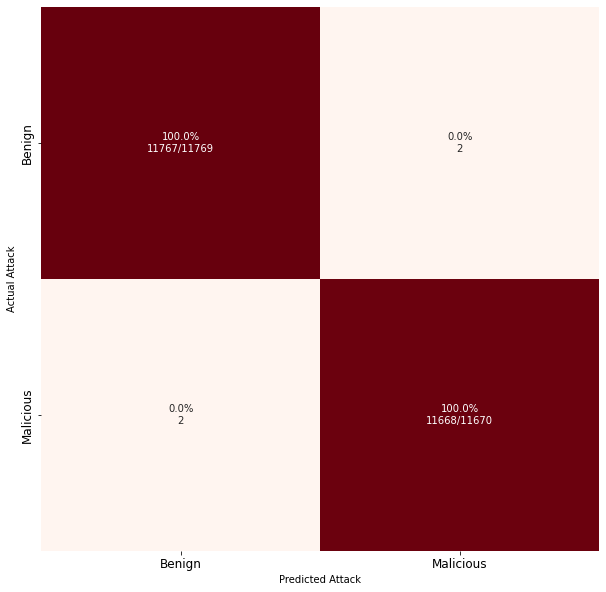

In [35]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                       svcscan.nservices    0.986316
48                svcscan.process_services    0.006901
8             handles.avg_handles_per_proc    0.002919
52                    callbacks.ncallbacks    0.001084
27                    malfind.commitCharge    0.000795
7                         handles.nhandles    0.000787
15                      handles.ndirectory    0.000539
24              ldrmodules.not_in_init_avg    0.000308
11                          handles.nevent    0.000124
12                        handles.ndesktop    0.000113
51                         svcscan.nactive    0.000085
19                         handles.nmutant    0.000028
40    psxview.not_in_pspcid_list_false_avg    0.000000
33              psxview.not_in_pspcid_list    0.000000
34            psxview.not_in_csrss_handles    0.000000
35                  psxview.not_in_session    0.000000
36                 psxview.not_in_deskthrd    0.000000
37        

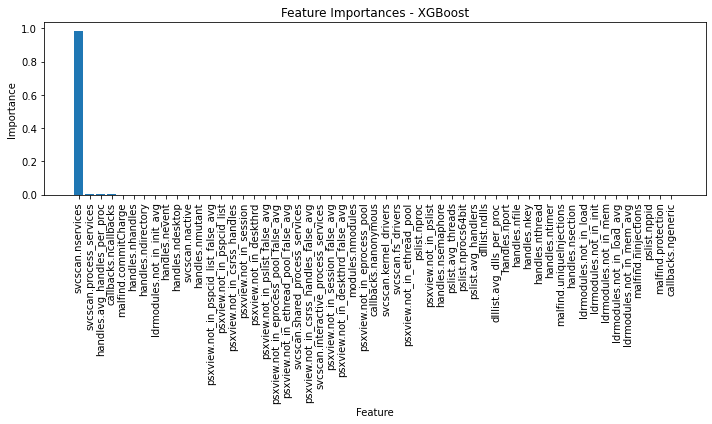

In [36]:
# Get the feature importance scores from the trained XGBoost model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

### Cross Validation for Decision Tree

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Assuming you have your feature matrix X and target variable y

# Initialize your model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, x, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)


Cross-Validation Scores: [0.99974403 1.         0.99564809 0.9983787  0.99991467]
Mean Score: 0.9987370979771771
Standard Deviation: 0.001653233282869065


# Model_2: RANDOM FOREST 

In [39]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)

In [40]:
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

Training Accuracy: 1.0
Test Accuracy: 0.9998720081914757


In [41]:
print(y_pred_rf)
cohen_kappa_score(y_test,y_pred_rf)

[0 1 0 ... 1 0 1]


0.9997440119084101

In [42]:
print("",classification_report(y_test,y_pred_rf))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11769
           1       1.00      1.00      1.00     11670

    accuracy                           1.00     23439
   macro avg       1.00      1.00      1.00     23439
weighted avg       1.00      1.00      1.00     23439



In [43]:
import pickle# save the model to disk
filename_rf= 'Binary_security_rf.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_rf=pickle.load(open('Binary_security_rf.sav','rb'))
load_pred_rf=load_model_rf.predict(X_test)

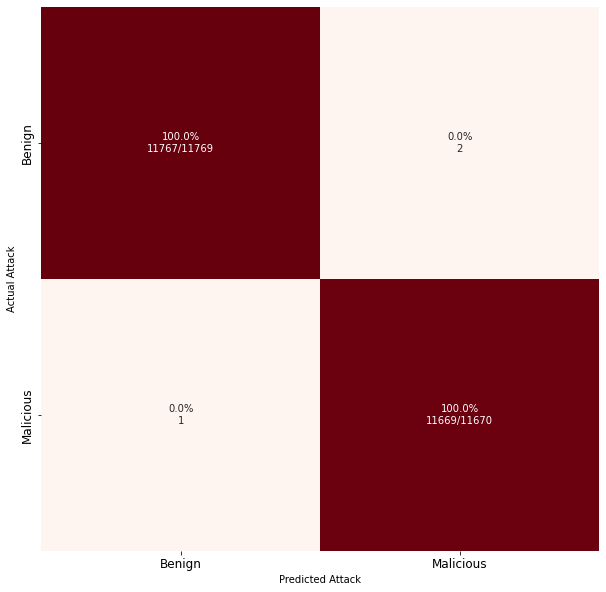

In [44]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, x, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [0.99982935 0.99991467 0.99488011 0.99914668 0.99991467]
Mean Score: 0.998737096521008
Standard Deviation: 0.0019498967208980563


                                   Feature  Importance
49         svcscan.shared_process_services    0.161097
46                  svcscan.kernel_drivers    0.123476
6                dlllist.avg_dlls_per_proc    0.110842
45                       svcscan.nservices    0.102940
8             handles.avg_handles_per_proc    0.099937
18                        handles.nsection    0.066790
19                         handles.nmutant    0.049468
13                            handles.nkey    0.038070
16                      handles.nsemaphore    0.036349
14                         handles.nthread    0.027769
5                            dlllist.ndlls    0.027631
22                   ldrmodules.not_in_mem    0.025641
11                          handles.nevent    0.024136
48                svcscan.process_services    0.017887
17                          handles.ntimer    0.017111
51                         svcscan.nactive    0.015653
4                      pslist.avg_handlers    0.013291
7         

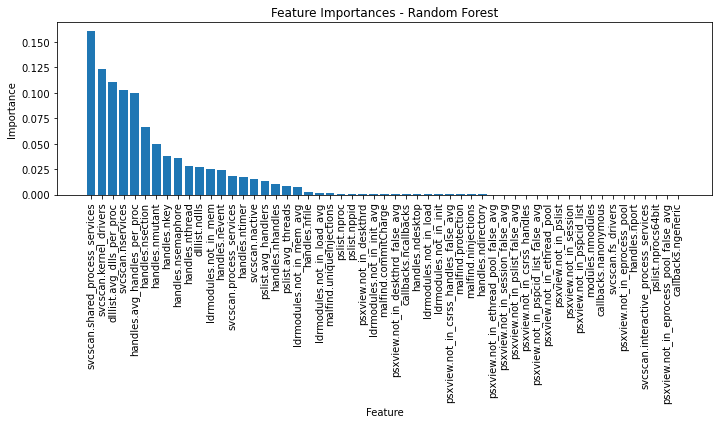

In [46]:
# Get the feature importance scores from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

# Model_3:LGBM 

In [47]:
import lightgbm  as lgb

In [48]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

[0 1 0 ... 1 0 1]


0.9997440120929303

In [49]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

Training Accuracy: 1.0
Test Accuracy: 0.9998720081914757


In [50]:
print("",classification_report(y_test,y_pred_lgbm))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11769
           1       1.00      1.00      1.00     11670

    accuracy                           1.00     23439
   macro avg       1.00      1.00      1.00     23439
weighted avg       1.00      1.00      1.00     23439



In [51]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9998720081914757


In [52]:
import pickle# save the model to disk
filename_lgbm= 'Binary_security_lgbm.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

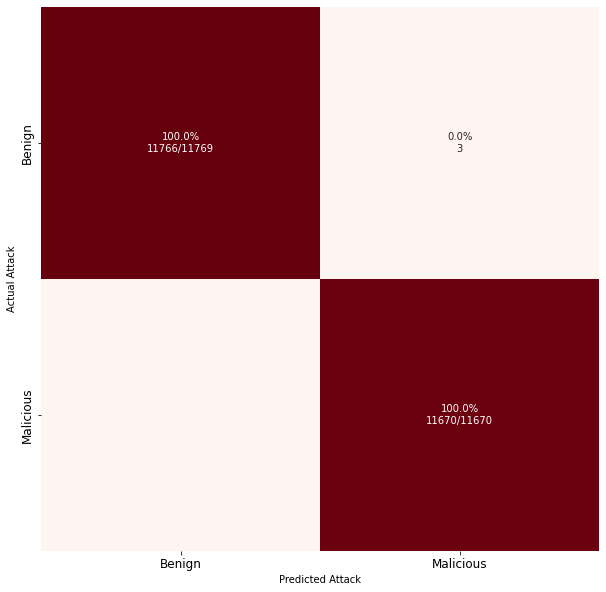

In [53]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
8             handles.avg_handles_per_proc         288
14                         handles.nthread         175
23              ldrmodules.not_in_load_avg         162
11                          handles.nevent         150
16                      handles.nsemaphore         135
27                    malfind.commitCharge         128
19                         handles.nmutant         111
52                    callbacks.ncallbacks         109
45                       svcscan.nservices         108
17                          handles.ntimer         105
4                      pslist.avg_handlers         104
48                svcscan.process_services         100
2                       pslist.avg_threads          97
43       psxview.not_in_deskthrd_false_avg          86
15                      handles.ndirectory          84
24              ldrmodules.not_in_init_avg          81
0                             pslist.nproc          73
51        

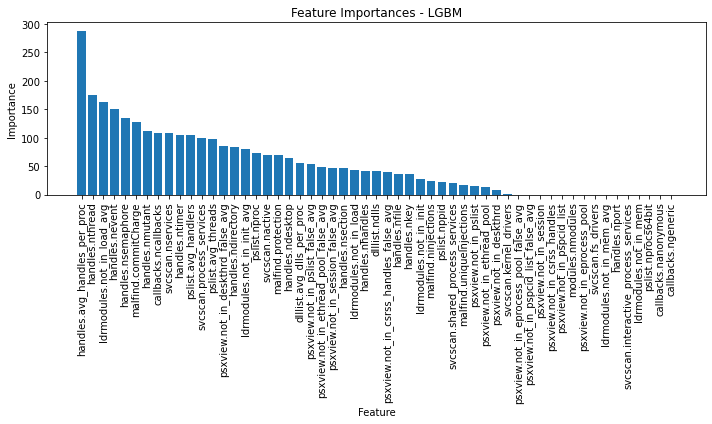

In [54]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM')
plt.tight_layout()
plt.show()

# Model_4: XGB 

In [ ]:
import xgboost as xgb

In [ ]:
xgb_nor=xgb.XGBClassifier(n_jobs=-1)
xgb_nor.fit(X_train,y_train)
y_pred_xgb_nor=xgb_nor.predict(X_test)
cohen_kappa_score(y_test,y_pred_xgb_nor) 

In [ ]:
# Predict on training and test sets
y_pred_train_xgb = xgb_nor.predict(X_train)
y_pred_test_xgb = xgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(f"Training Accuracy: {accuracy_train_xgb}")
print(f"Test Accuracy: {accuracy_test_xgb}")

In [ ]:
print("",classification_report(y_test,y_pred_xgb_nor))

In [ ]:
import pickle# save the model to disk
filename_xgb= 'Binary_security_xgb.sav'
pickle.dump(xgb_nor, open(filename_xgb, 'wb'))
load_model_xgb=pickle.load(open('Binary_security_xgb.sav','rb'))
load_pred_xgb=load_model_xgb.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_xgb)
plt.savefig('cm.eps',dpi=600)

In [ ]:
# Get the feature importance scores from the trained XGBoost model
feature_importance = xgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(xgb_nor, x, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

# Model_5:Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create an instance of the SVM model
svm_model = SVC(kernel='linear')

In [ ]:
# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

In [ ]:
# Predict on training and test sets
y_pred_train_svc = svm_model.predict(X_train)
y_pred_test_svc = svm_model.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_svc = accuracy_score(y_train, y_pred_train_svc)
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(f"Training Accuracy: {accuracy_train_svc}")
print(f"Test Accuracy: {accuracy_test_svc}")

In [ ]:
import pickle# save the model to disk
filename_svc= 'Binary_security_svc.sav'
pickle.dump(svm_model, open(filename_svc, 'wb'))
load_model_svc=pickle.load(open('Binary_security_svc.sav','rb'))
load_pred_svc=load_model_svc.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_svc)
plt.savefig('cm.eps',dpi=600)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(svm_model, x, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

In [ ]:
from sklearn.feature_selection import RFE

# Perform feature selection using RFE
rfe = RFE(estimator=svm_model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Create a DataFrame to store the feature names and their ranking
feature_ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

# Print the feature ranking
print(feature_ranking_df)


# Model-6: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

In [ ]:
print("",classification_report(y_test,y_pred_test_nb))

In [ ]:
import pickle# save the model to disk
filename_nb= 'Binary_security_nb.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

In [ ]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, x, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

# Convolutional Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [ ]:
# Create a Sequential model
model = Sequential()

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocess input sequences
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Create and compile the model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# ROC 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    'XGB':xgb_nor.predict_proba(X_test)[:,1],
    #'SVC':svm_model.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    })

In [ ]:
proba_df.to_csv('probability.csv')

In [ ]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [ ]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,xgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','XGBM','NB']
est_1=est(clf,name)

In [ ]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


In [ ]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

In [ ]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics.csv')